## Python statistics essential training - 05_02_fitmodel

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gapminder.head(8)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389
5,Afghanistan,1850,Asia,3810047.0,27.70,52.433,7.0,669.0,1.831622
6,Afghanistan,1860,Asia,3973968.0,27.60,52.290,7.0,692.0,1.894593
7,Afghanistan,1870,Asia,4169690.0,27.49,52.147,7.0,716.0,1.960301


In [8]:
gdata = gapminder.query('year == 1985')

In [10]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

<AxesSubplot:xlabel='age5_surviving', ylabel='babies_per_woman'>

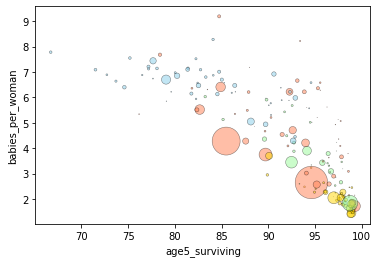

In [11]:
gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

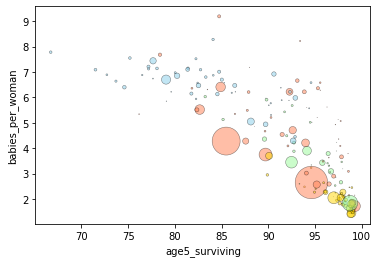

In [12]:
plotdata()

In [14]:
model = smf.ols(formula ='babies_per_woman ~ 1', data= gdata)

In [15]:
grandmean = model.fit()

In [16]:
grandmean

In [21]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
              c = colors, s = 30, edgecolor = 'k', marker = 'D', linewidths=0.5)

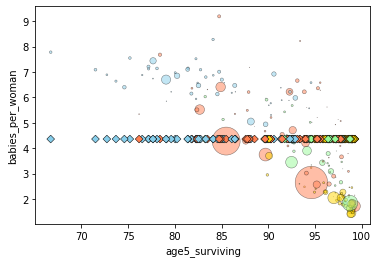

In [22]:
plotfit(grandmean)

In [23]:
grandmean.params

Intercept    4.360714
dtype: float64

In [25]:
gdata.babies_per_woman.mean()

4.360714285714285

In [28]:
groupmeans = smf.ols(formula = 'babies_per_woman ~ 1+region',data = gdata).fit()

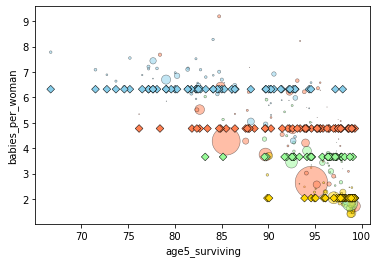

In [29]:
plotfit(groupmeans)

In [31]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [32]:
groupmeans = smf.ols(formula = 'babies_per_woman ~ -1+region',data = gdata).fit()

In [33]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [34]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [35]:
surviving = smf.ols(formula = 'babies_per_woman ~ 1+region+age5_surviving',data = gdata).fit()

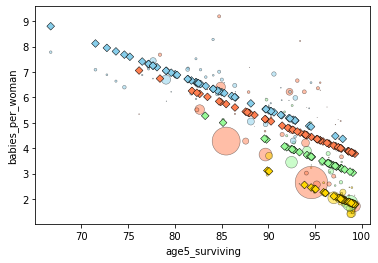

In [36]:
plotfit(surviving)

In [37]:
surviving.params

Intercept            18.265792
region[T.America]    -1.179908
region[T.Asia]       -0.401052
region[T.Europe]     -2.393610
age5_surviving       -0.141886
dtype: float64

In [38]:
surviving_byregion = smf.ols(formula = 'babies_per_woman ~ 1+region+age5_surviving:region',data = gdata).fit()

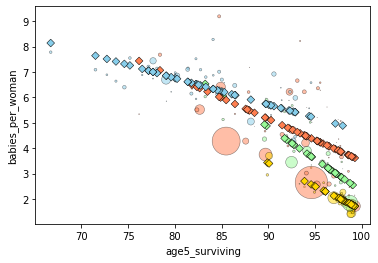

In [40]:
plotfit(surviving_byregion)

In [41]:
surviving_byregion.params

Intercept                         15.080914
region[T.America]                 12.425329
region[T.Asia]                     4.951569
region[T.Europe]                   4.803532
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [42]:
surviving_byregion_population = smf.ols(formula = 'babies_per_woman ~ 1+region+age5_surviving:region+population',data = gdata).fit()

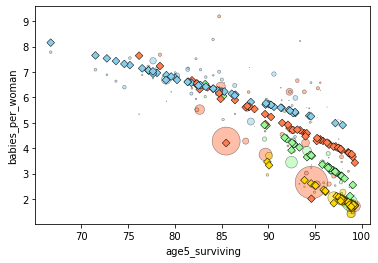

In [43]:
plotfit(surviving_byregion_population)

In [44]:
surviving_byregion_population.params

Intercept                         1.513953e+01
region[T.America]                 1.207559e+01
region[T.Asia]                    5.469708e+00
region[T.Europe]                  4.835486e+00
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702391e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367913e-09
dtype: float64

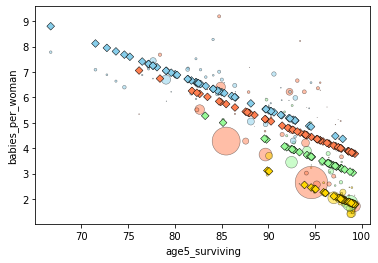

In [45]:
plotfit(surviving)

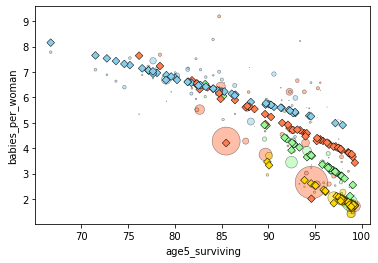

In [46]:
plotfit(surviving_byregion_population)

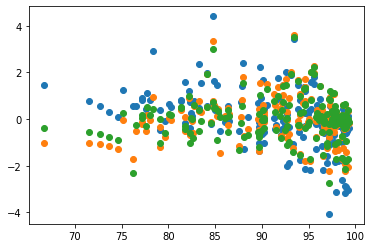

In [48]:
pp.scatter(gdata.age5_surviving, groupmeans.resid)
pp.scatter(gdata.age5_surviving, surviving.resid)
pp.scatter(gdata.age5_surviving, surviving_byregion_population.resid)

In [50]:
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.mse_resid)

1.4979520263709154
0.9423025333008324
0.8480227300570431


In [51]:
for model in [groupmeans, surviving,surviving_byregion_population]:
    print(model.rsquared)

0.636467696559659
0.7726009080146058
0.7999775707885192


In [52]:
for model in [groupmeans, surviving,surviving_byregion_population]:
    print(model.fvalue)

103.88003937611687
150.34180603430977
86.4878755672505


In [53]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           8.26e-56
Time:                        13:19:34   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            18.2658      1.168     15.639      0.000      15.961      20.571
region[T.America]    -1.1799      0.259     -4.555      0.000      -1.691      -0.669
region[T.Asia]       -0.4011      0.220     -1.825      0.070      -0.835       0.033
region[T.Europe]     -2.3936      0.270     -8.860      0.000      -2.927      -1.860
age5_surviving       -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [55]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,466.821946,155.607315,165.135198,4.597815e-51
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [56]:
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,466.821946,155.607315,183.494274,1.639535e-53
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN
